In [231]:
import pandas as pd
df_anim = pd.read_csv("animal.csv")
df_anim.head(1)

#supprimer espaces debut et fin titres
df_anim.columns = df_anim.columns.str.strip()

#remplacer espaces par _
df_anim.rename(columns=lambda x : x.replace('.', '_').replace(' ', '_'), inplace = True) 

#mettre titre en minuscule
df_anim.columns = df_anim.columns.str.lower()
df_anim.head(1)

#dimension = 2

df_anim["type"]= "animal"
df_anim.head(1)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.67,E,Estimated value,animal


In [232]:
df_veg = pd.read_csv("vegetal.csv")
#supprimer espaces debut et fin titres
df_veg.columns = df_veg.columns.str.strip()

#remplacer espaces par _
df_veg.rename(columns=lambda x : x.replace('.', '_').replace(' ', '_'), inplace = True) 

#mettre titre en minuscule
df_veg.columns = df_veg.columns.str.lower()
df_veg.head(2)

#ajouter colone type ="végétal"
df_veg["type"]= "vegetal"
df_veg.shape


#dimension = 2


(92233, 15)

In [233]:
df_pop = pd.read_csv("population.csv")

#supprimer espaces debut et fin titres
df_pop.columns = df_pop.columns.str.strip()

#remplacer espaces par _
df_pop.rename(columns=lambda x : x.replace('.', '_').replace(' ', '_'), inplace = True) 

#mettre titre en minuscule
df_pop.columns = df_pop.columns.str.lower()
df_pop.head(2)

df_pop.head(5)


#dimensions de table = 2

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,36686.78,X,Figure from international organizations
1,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 No,37769.50,X,Figure from international organizations
2,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,2877.01,X,Figure from international organizations
3,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 No,2873.88,X,Figure from international organizations
4,FBS,Food Balances (2010-),12,Algeria,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,41927.01,X,Figure from international organizations


In [234]:
df_anim.head(2)


,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.67,E,Estimated value,animal
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.76,E,Estimated value,animal


In [235]:
df_veg.head(2)


,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,162.62,E,Estimated value,vegetal
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2019,2019,kg,160.40,E,Estimated value,vegetal


In [236]:
df_product = pd.concat([df_anim, df_veg], axis=0)
df_product.shape

(119946, 15)

Transformez df_pop afin de ne garder que le code du pays (area_code), le pays (area), l’année (year_code) et la population (value). Renommer la colonne ‘value’ en ‘pop_1000_hab’.

In [237]:
df_pop.head(2)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,36686.78,X,Figure from international organizations
1,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 No,37769.50,X,Figure from international organizations


In [238]:
#on liste le nom des colonnes de df_pop
column_names = list(df_pop.columns)
column_names

#on pop les noms 
df_pop = df_pop.drop(['domain_code',
 'domain',
 'element_code',
 'element',
 'item_code_(fbs)',
 'year_code',
 'unit',
 'item',
 'flag',
 'flag_description'],
 axis = 1)

df_pop=df_pop.rename(columns={'value': 'pop_1000_hab'})
df_pop

,area_code_(m49),area,year,pop_1000_hab
0,4,Afghanistan,2018,36686.78
1,4,Afghanistan,2019,37769.50
2,8,Albania,2018,2877.01
3,8,Albania,2019,2873.88
4,12,Algeria,2018,41927.01
...,...,...,...,...
359,887,Yemen,2019,31546.69
360,894,Zambia,2018,17835.89
361,894,Zambia,2019,18380.48
362,716,Zimbabwe,2018,15052.18


Transformez product afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit.

In [239]:
df_product.head(2)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.67,E,Estimated value,animal
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.76,E,Estimated value,animal


In [240]:
#créer copie de df_product
df_product_bis = df_product.copy()

#liste les colonnes de df_product_bis
df_product_bis.columns

#pop tous les éléments sauf area_code_(fao), area, element, item, year, type, value
df_product_bis = df_product_bis.drop(['domain_code', 'domain', 'element_code',
'item_code_(fbs)', 'year_code', 'unit',
'flag', 'flag_description'], axis=1)

#visualise df_product_bis
df_product_bis

,area_code_(m49),area,element,item,year,value,type
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2018,2.67,animal
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2019,2.76,animal
2,4,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2018,14.92,animal
3,4,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2019,15.42,animal
4,4,Afghanistan,Protein supply quantity (g/capita/day),Bovine Meat,2018,1.12,animal
...,...,...,...,...,...,...,...
92228,716,Zimbabwe,Food supply (kcal/capita/day),Miscellaneous,2019,7.52,vegetal
92229,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2018,0.19,vegetal
92230,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2019,0.46,vegetal
92231,716,Zimbabwe,Fat supply quantity (g/capita/day),Miscellaneous,2018,0.03,vegetal


In [241]:
df_pop

,area_code_(m49),area,year,pop_1000_hab
0,4,Afghanistan,2018,36686.78
1,4,Afghanistan,2019,37769.50
2,8,Albania,2018,2877.01
3,8,Albania,2019,2873.88
4,12,Algeria,2018,41927.01
...,...,...,...,...
359,887,Yemen,2019,31546.69
360,894,Zambia,2018,17835.89
361,894,Zambia,2019,18380.48
362,716,Zimbabwe,2018,15052.18


Fusionnez df_pop avec product et nommez ce DataFrame df. Afin de fusionner ces jeux de données vous devez identifier les clés primaires. Renommer les colonnes comme sur le capture d’écran ci-dessous.

In [242]:
df_pop.head(2)


,area_code_(m49),area,year,pop_1000_hab
0,4,Afghanistan,2018,36686.78
1,4,Afghanistan,2019,37769.50


In [243]:
df_product_bis.head(2)

,area_code_(m49),area,element,item,year,value,type
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2018,2.67,animal
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2019,2.76,animal


In [244]:
df = pd.merge(df_pop,df_product_bis, on= ['area', 'area_code_(m49)', 'year'], how='left')
df.columns
df.head(2)

df=df.rename(columns={"area":"country", "area_code_(m49)":"country_code"})
df = df.drop(['year_code'],axis = 1)


KeyError: "['year_code'] not found in axis"

Quelles sont les types de données de chaque colonne ?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238025 entries, 0 to 238024
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_code  238025 non-null  int64  
 1   country       238025 non-null  object 
 2   item          238025 non-null  object 
 3   unit          238025 non-null  object 
 4   pop_1000_hab  238025 non-null  float64
 5   element       238025 non-null  object 
 6   year          238025 non-null  int64  
 7   value         238025 non-null  float64
 8   type          238025 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 16.3+ MB


Combien y-a t’il de valeurs manquantes par variable ?


In [ ]:
missing_values = df.isna().sum()
print(missing_values)

country_code    0
country         0
item            0
unit            0
pop_1000_hab    0
element         0
year            0
value           0
type            0
dtype: int64


Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.

In [ ]:
df.describe()


,country_code,pop_1000_hab,year,value
count,238025.000000,2.380250e+05,238025.000000,238025.000000
mean,427.363848,4.359532e+04,2018.505212,11.634431
std,250.154847,1.539645e+05,0.499974,56.452648
min,4.000000,1.213000e+01,2018.000000,0.000000
25%,208.000000,2.609490e+03,2018.000000,0.010000
50%,418.000000,9.958830e+03,2019.000000,0.270000
75%,642.000000,3.220394e+04,2019.000000,3.320000
max,894.000000,1.421864e+06,2019.000000,1744.850000


<Axes: ylabel='value'>

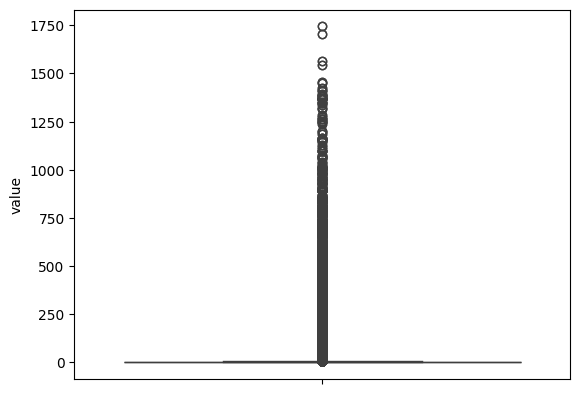

In [ ]:
import seaborn as sns
sns.boxplot(df['value'])

Afficher la valeur unique de colone "country"

In [ ]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polyn

In [ ]:
#avoir un aperçu de nos données pour les composantes de la Chine
regions_speciales = ['China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of']
#ceci est un bonus

Modifiez votre jeu de données afin que les informations soient indexées par country_code, country, year, pop_1000_hab, type et item. 
Les valeurs de la colonne element doivent être séparées dans des colonnes différentes. Recherchez sur internet la différence entre les formats long et les formats wide. Pour réussir cette étape creuser la méthode pivot_table. Il est préférable d’appliquer la méthode reset_index() après avoir utilisé la méthode précédente.

In [ ]:
df.shape

(119946, 7)

In [ ]:
df_wide = df.pivot_table(index=['country_code', 'country', 'year', 'pop_1000_hab', 'type','item'], columns='element', values='value').reset_index()

In [ ]:
df_wide

element,country_code,country,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
30011,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
30012,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
30013,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
30014,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


Faire du nettoyage dans le nom des colonnes
Notez bien la dimension du jeu de données. Si tout s'est bien déroulé vous devez avoir le même resultat, sinon revoyez les étapes précédentes.


In [246]:
#supprimer espaces debut et fin titres
df_wide.columns = df_wide.columns.str.strip()

#remplacer espaces par _
df_wide.rename(columns=lambda x : x.replace('.', '_').replace(' ', '_'), inplace = True) 

#mettre titre en minuscule
df_wide.columns = df_wide.columns.str.lower()

#changer nom colonne "type" en "product categorie"
df_wide.rename(columns={'type': 'product_category'}, inplace=True)
df_wide


element,country_code,country,year,pop_1000_hab,product_category,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
30011,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
30012,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
30013,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
30014,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018


In [252]:
df_wide[df_wide["year"] == 2018]


element,country_code,country,year,pop_1000_hab,product_category,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
29926,894,Zambia,2018,17835.89,vegetal,Tea (including mate),0.00,0.04,0.11,0.00
29927,894,Zambia,2018,17835.89,vegetal,Tomatoes and products,0.01,0.77,1.38,0.03
29928,894,Zambia,2018,17835.89,vegetal,"Vegetables, other",0.18,15.27,20.14,1.28
29929,894,Zambia,2018,17835.89,vegetal,Wheat and products,0.29,60.49,7.99,1.91


Nous allons ajouter une nouvelle colonne à notre jeu de données : la zone géographique. Pour cela rendez-vous sur le site de la FAO, votre objectif est de télécharger des nouveaux datasets pour ajouter les zones suivantes à votre jeu de données : 'eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america', 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia'

In [255]:
df_region = pd.read_csv("region_data.csv")
df_region.head(3)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),14,Eastern Africa,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,25.92,E,Estimated value
1,FBS,Food Balances (2010-),14,Eastern Africa,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2019,2019,kg,26.20,E,Estimated value
2,FBS,Food Balances (2010-),14,Eastern Africa,645,Food supply quantity (kg/capita/yr),S2807,Rice and products,2018,2018,kg,27.13,E,Estimated value


In [254]:
df_wide.head(2)

element,country_code,country,year,pop_1000_hab,product_category,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02


In [277]:
#df_wide_region= pd.merge()
df_region.rename(columns={'Area Code (M49)': 'country_code','Area':'region', 'Year':'year'}, inplace=True)
df_region = df_region[["country_code", "region"]]   

df_region   

/tmp/ipykernel_12968/3075106247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region.rename(columns={'Area Code (M49)': 'country_code','Area':'region', 'Year':'year'}, inplace=True)


,country_code,region
0,14,Eastern Africa
1,14,Eastern Africa
2,14,Eastern Africa
3,14,Eastern Africa
4,14,Eastern Africa
...,...,...
3964,61,Polynesia
3965,61,Polynesia
3966,61,Polynesia
3967,61,Polynesia


In [276]:
df_wideandregion = pd.merge(df_wide, df_region, on= ['country_code'], how='left' )
df_wideandregion

,country_code,country,year,pop_1000_hab,product_category,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),region
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12,NaN
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02,NaN
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00,NaN
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03,NaN
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30011,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00,NaN
30012,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03,NaN
30013,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12,NaN
30014,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80,NaN
